# Analisis exploratorio de datos

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from ydata_profiling import ProfileReport
warnings.simplefilter(action='ignore', category=FutureWarning)

1) Se carga el dataset a analizar

In [180]:
movies_eda = pd.read_parquet("../datasets/movies_eda.parquet")
# movies_eda_csv = pd.read_csv("../datasets/movies_eda.csv")

In [181]:
movies_eda.head(3) # Chequeo de los primeros datos del dataset

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,release_year,name_genre,collection,company,countries,language,return,actors_names,director_names
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,5415.0,1995,"[Animation, Family, Comedy]",Toy Story Collection,Pixar Animation Studios,United States of America,English,12.451801,"[Erik von Detten, Jim Varney, Wallace Shawn, P...",[John Lasseter]
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,2413.0,1995,"[Family, Adventure, Fantasy]",[],TriStar Pictures Teitler Film Interscope Commu...,United States of America,English Français,4.043035,"[Bonnie Hunt, Brandon Obray, Bradley Pierce, G...",[Joe Johnston]
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.0,1995,"[Romance, Comedy]",Grumpy Old Men Collection,Warner Bros. Lancaster Gate,United States of America,English,0.000000,"[Walter Matthau, Ann-Margret, Jack Lemmon, Bur...",[Howard Deutch]


In [182]:
movies_eda.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'release_year', 'name_genre',
       'collection', 'company', 'countries', 'language', 'return',
       'actors_names', 'director_names'],
      dtype='object')

* Se extraen los dummies para luego analizar cual genero sobresale con respecto al resto

In [139]:
genres = movies_eda['name_genre'].explode().str.get_dummies().groupby(level=0).sum()

- Pequeño vistazo de los datasets

In [140]:
movies_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42236 entries, 0 to 42235
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             42236 non-null  Float64       
 1   id                 42236 non-null  int32         
 2   original_language  42225 non-null  object        
 3   overview           41334 non-null  object        
 4   popularity         42236 non-null  float64       
 5   release_date       42236 non-null  datetime64[ns]
 6   revenue            42236 non-null  float64       
 7   runtime            41997 non-null  float64       
 8   status             42161 non-null  object        
 9   tagline            19053 non-null  object        
 10  title              42236 non-null  object        
 11  vote_average       42236 non-null  float64       
 12  vote_count         42236 non-null  float64       
 13  release_year       42236 non-null  int32         
 14  name_g

In [141]:
movies_eda.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,42236.0,42236.000000,42236.000000,42236,4.223600e+04,41997.000000,42236.000000,42236.000000,42236.000000,4.223600e+04
mean,4158984.580216,106643.196160,2.914570,1992-05-28 08:28:12.432995584,1.116029e+07,93.846108,5.631494,109.331731,1991.916304,7.090847e+02
min,0.0,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.0,25773.750000,0.387676,1978-11-07 06:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.0,58395.500000,1.136580,2001-06-08 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.0,152809.250000,3.720514,2010-11-02 06:00:00,0.000000e+00,107.000000,6.800000,35.000000,2010.000000,0.000000e+00
max,380000000.0,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,17209002.025013,111668.737789,5.743069,NaN,6.374327e+07,37.681428,1.921202,489.118362,23.840613,7.741987e+04


In [196]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42236 entries, 0 to 42235
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Action           42236 non-null  int64
 1   Adventure        42236 non-null  int64
 2   Animation        42236 non-null  int64
 3   Comedy           42236 non-null  int64
 4   Crime            42236 non-null  int64
 5   Documentary      42236 non-null  int64
 6   Drama            42236 non-null  int64
 7   Family           42236 non-null  int64
 8   Fantasy          42236 non-null  int64
 9   Foreign          42236 non-null  int64
 10  History          42236 non-null  int64
 11  Horror           42236 non-null  int64
 12  Music            42236 non-null  int64
 13  Mystery          42236 non-null  int64
 14  Romance          42236 non-null  int64
 15  Science Fiction  42236 non-null  int64
 16  TV Movie         42236 non-null  int64
 17  Thriller         42236 non-null  int64
 18  War        

In [142]:
genres.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.000000,42236.00000,42236.000000
mean,0.145161,0.076688,0.043825,0.297377,0.093806,0.089639,0.441330,0.061440,0.050384,0.035609,0.030945,0.099986,0.035917,0.053769,0.147552,0.067099,0.016005,0.162752,0.02943,0.023298
std,0.352267,0.266099,0.204708,0.457109,0.291562,0.285668,0.496552,0.240139,0.218738,0.185317,0.173171,0.299985,0.186086,0.225565,0.354659,0.250197,0.125497,0.369144,0.16901,0.150849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


#### Primera observacion:
1) <p>Con este primer acercamiento se puede analizar que el dataset de <i>movies</i> cuenta con porcentaje bastante alto de registros rellenados, es decir, carece de valores nulos. Sin embargo, esto no sugiere que todos sus datos nos aporten informacion</p>
2) <p>Los datos de columnas relacionados a dinero, ya sea <b><i>budget, revenue o return</i></b> son los que presentan una desviacion estandard más elevada, sin embargo, como el presente dataset alberga datos de peliculas que fueron emitidas en un variado abanico de años, es de esperarse tales numeros</p>
3) <p>Partiendo del dataframe de <i>genres</i>, al observar el dato de la media <i>(mean)</i>, se sugiere que las peliculas del genero drama, seran aquellas que predominen por sobre las demas</p>

## Presentacion de la informacion mediante gráficos

* Analisis de en que lengua se producen mas peliculas

<Axes: title={'center': 'Cantidad de peliculas / Lenguaje original'}, xlabel='original_language', ylabel='count'>

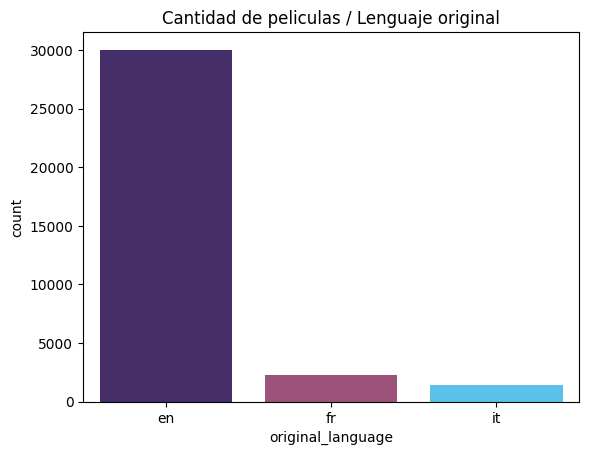

In [143]:
order = movies_eda["original_language"].value_counts().iloc[:3].index
plt.title("Cantidad de peliculas / Lenguaje original")
sns.countplot(data=movies_eda, x="original_language",order=order,palette=['#432371',"#aA457B","#44ccff"],legend=False)

Dentro del presente dataset se puede observar una superioridad de produccion de peliculas de habla inglesa. Esto se podria deber a muchas causas, pero solo conformariamos hipotesis no son de nuestro interes en estos momentos.

### Analisis de que genero sobresale con respecto a los demas

In [144]:
genres[genres["Animation"]==1]["Animation"].sum() #Demostracion de que es lo que se planteara en la proxima celda

1851

In [184]:
genre_columns = genres.columns[0:]
cant_per_genre = {genre: genres[genres[genre] == 1][genre].sum() for genre in genre_columns}

In [185]:
df_genre_cant = pd.DataFrame(cant_per_genre.items(),columns=["Genero","Cantidad de peliculas"]).sort_values(by="Cantidad de peliculas", ascending=False)

In [186]:
df_genre_cant

,Genero,Cantidad de peliculas
6,Drama,18640
3,Comedy,12560
17,Thriller,6874
14,Romance,6232
0,Action,6131
11,Horror,4223
4,Crime,3962
5,Documentary,3786
1,Adventure,3239
15,Science Fiction,2834


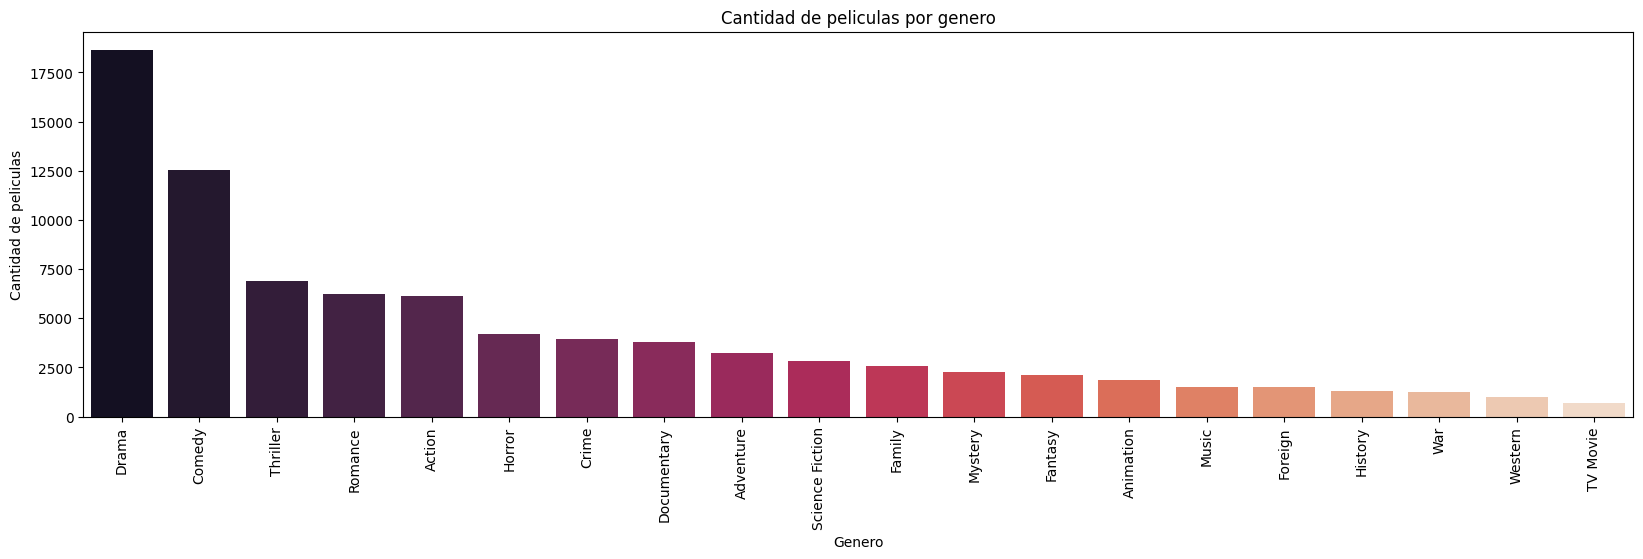

In [187]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set_title("Cantidad de peliculas por genero")
sns.barplot(df_genre_cant,x="Genero",y="Cantidad de peliculas",palette="rocket")
plt.xticks(rotation = 90)
plt.show()

Se puede observar como la categoria  `drama` sobresale por sobre el resto

Duracion de las peliculas

Text(0.5, 1.0, 'Cantidad de peliculas / Duracion')

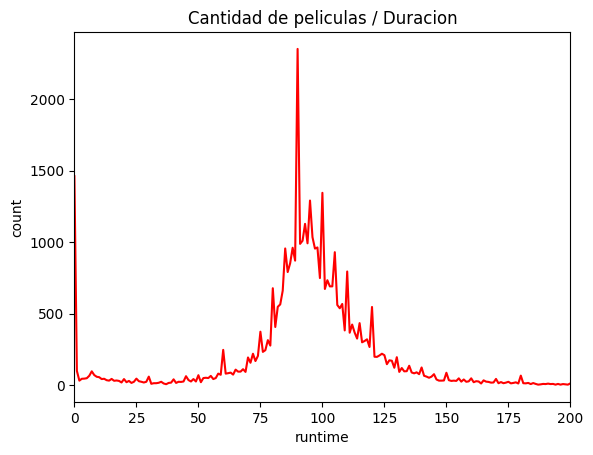

In [149]:
cant = movies_eda["runtime"].value_counts()
# plt.plot(color="yellow")
sns.lineplot(cant,color="red")
plt.xlim([0,200])
plt.title("Cantidad de peliculas / Duracion")


<p style=color:rgb(150,150,150)>Se aprecia como la gran cantidad de peliculas se aproximan a una duracion de 80/90 minutos</p>

Lanzamientos por año

(1920.0, 2020.0)

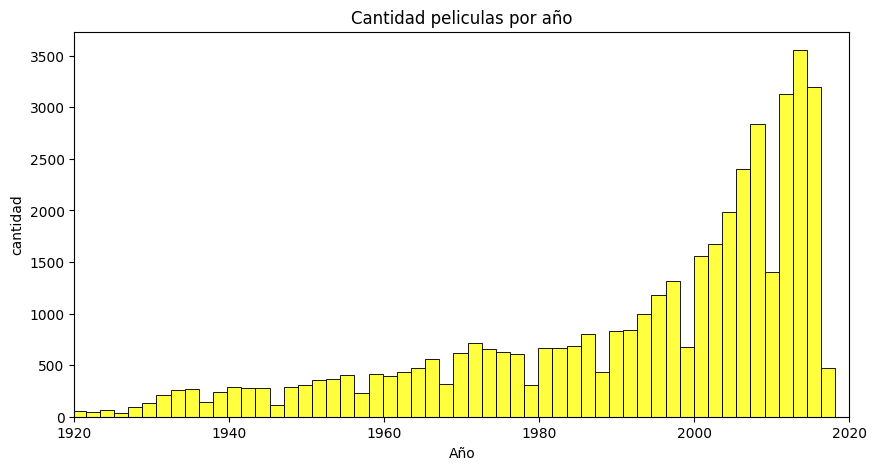

In [150]:
# genero = genres[genres==1].sum().sort_values(ascending=False)[0:10]
# years = movies_eda.value_counts(subset="release_year")
fig,ax=plt.subplots(figsize=(10,5))
# sns.lineplot(years)
# plt.xticks(rotation=45)
# plt.show()

sns.histplot(movies_eda["release_year"],color="yellow")
plt.xlabel("Año")
plt.ylabel("cantidad")
plt.title("Cantidad peliculas por año")
plt.xlim([1920,2020])

* Mediante el histograma anteriormente presentado, se puede notar un gran aumento con el pasar de los años. Ya sea por el avance tecnologico, la demanda,etc.

#### Analisis de las compañias mayoritarias del mercado

<Axes: xlabel='company', ylabel='count'>

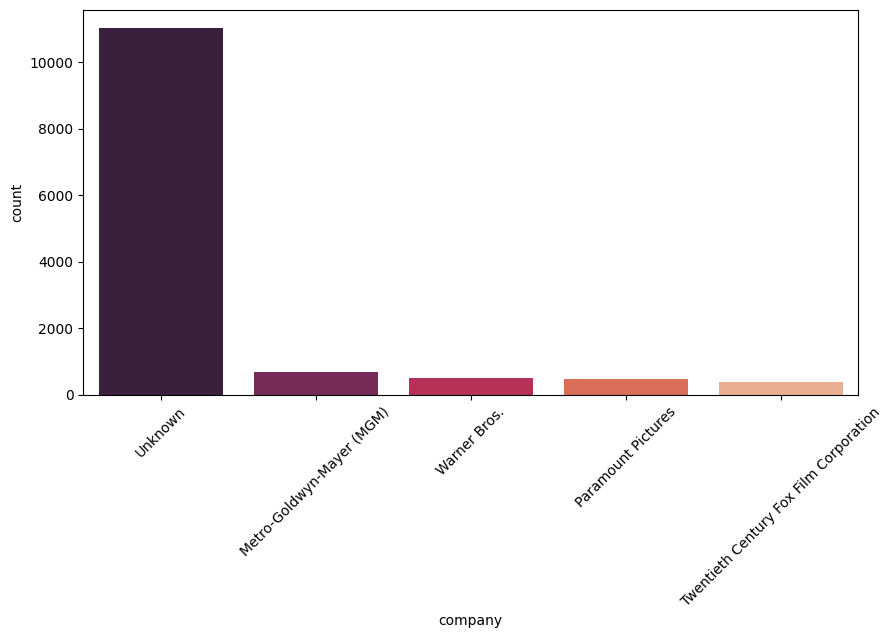

In [151]:
company = movies_eda["company"].value_counts(ascending=False)[0:5]
fig,axes=plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
# sns.histplot(movies_eda["company"])
sns.barplot(company,palette="rocket")

* Se observa mediante los siguientes parametros que hay una cantidad muy grande de peliculas a las cuales no se les ha asignado una productora en el Dataset

### Analisis correlaciones entre variables numericas

<Axes: >

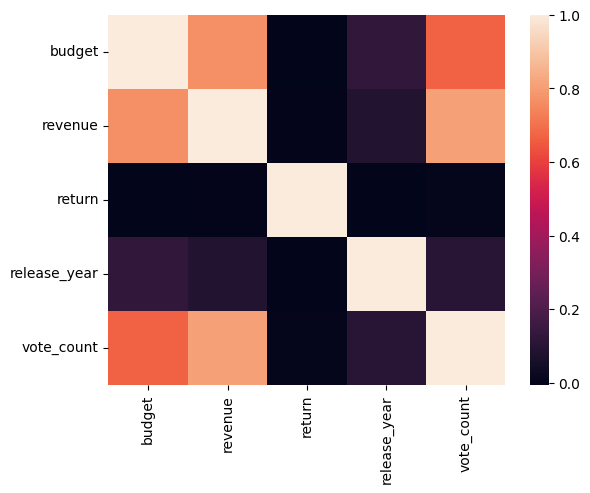

In [152]:
no_nan=movies_eda[["budget","revenue","return","release_year","vote_count"]]

sns.heatmap(no_nan[~no_nan.isna()].corr())

<p>Mediante el anterior analisis se puede observar que la cantidad de votos aumenta con la cantidad de presupuesto de la pelicula. Este analisis podria sugerir que gran parte del dinero pudo haber sido provisto con el fin de llegar a mas cantidad de personas</p>

### Cantidad promedio de votos por genero

In [188]:
df_merged = pd.concat([genres,movies_eda],axis=1)
genre_columns = genres.columns[0:]
avg_votes_per_genre = {genre: df_merged[df_merged[genre] == 1]['vote_count'].mean() for genre in genre_columns}

In [189]:
content = avg_votes_per_genre.items()

In [190]:
df_genre = pd.DataFrame(content,columns=["genre","cant_votos"]).sort_values(ascending=False,by="cant_votos")

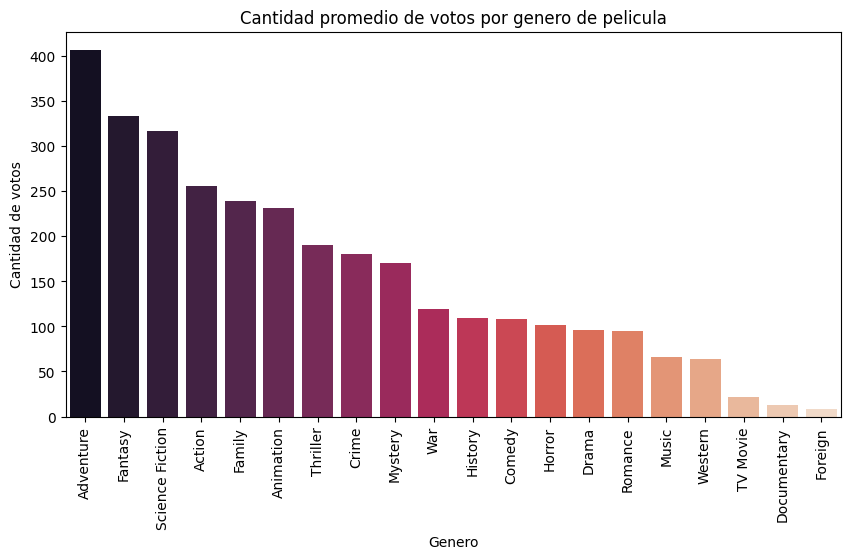

In [191]:
fig,axes = plt.subplots(figsize=(10,5))
sns.barplot(df_genre, x="genre",y="cant_votos",palette="rocket")
plt.xticks(rotation=90)
plt.title("Cantidad promedio de votos por genero de pelicula")
plt.xlabel("Genero")
plt.ylabel("Cantidad de votos")
plt.show()

A pesar de que el genero `drama` sea aquel que posee mas peliculas, es notorio como la categoria `adventure`, posee mas cantidad de votos

### Nubes de palabra de la columna `overview` y `title`

In [192]:
movies_eda["overview"]

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
42231    A film archivist revisits the story of Rustin ...
42232    It's the year 3000 AD. The world's most danger...
42233    An artist struggles to finish his work while a...
42234    In a small town live two brothers, one a minis...
42235    50 years after decriminalisation of homosexual...
Name: overview, Length: 42236, dtype: object

In [193]:
movies_eda["overview"] = movies_eda["overview"].fillna(value=".")
titulo = " ".join(movies_eda["title"])
overview = " ".join(movies_eda["overview"])

In [194]:
from wordcloud import WordCloud
wordcloud_title = WordCloud().generate(titulo)
wordcloud_overview = WordCloud().generate(overview)

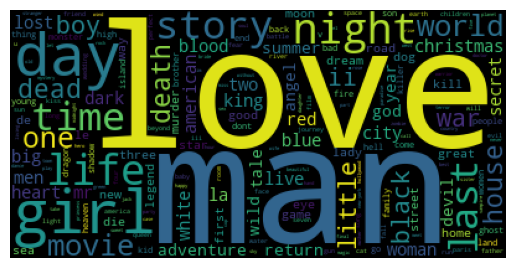

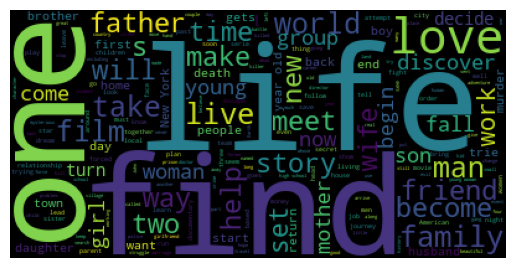

In [195]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud_title)
plt.axis("off")
plt.show()

plt.imshow(wordcloud_overview)
plt.axis("off")
plt.show()